# **Análise de Banco de Dados de partidas competitivas do jogo League of Legends**


---


**Banimentos**

Cada equipe tem direito ao banimento de cinco personagens que não poderão ser escolhidos para aquela partida.


---


**Abates**

Um dos objetivos do jogo que fazem o jogador ganhar dinheiro para ficar mais forte é o abate de um personagem do time oposto.


---

**Lados do campo**

Cada time (composto por 5 jogadores cada) é alocado em uma parte do mapa, sendo a parte inferior do time azul e a superior do time vermelho.


![alt text](https://uploaddeimagens.com.br/images/002/559/161/original/Map.png?1585599165)


---


**Objetivo Primário**

O objetivo principal do jogo é destruir as torres de alguma das rotas presentes no mapa (top, mid e bot) para chegar a base inimiga e destruir o inibidor e em seguida o nexus, assim acabando com a partida e declarando o vencedor.


---


**Monstros épicos**

Os monstros épicos fornecem "poderes" extras (buffs) para o time que os derrota. Os monstros são: Dragão, Arauto e o Barão; realizados em tempos oportunos em partidas competitivas.


---




## BIBLIOTECAS

In [ ]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



---


## LEITURA DOS ARQUIVOS CSV

In [ ]:
bans = pd.read_csv("bans.csv")                                                 
#kills = pd.read_csv("kills.csv")       
matchinfo = pd.read_csv("matchinfo.csv") 
monsters = pd.read_csv("monsters.csv")
structures = pd.read_csv("structures.csv")



---


## INFORMAÇÕES DOS BANIMENTOS

In [ ]:
print(bans.ban_1.describe()["top"])
print(bans.ban_2.describe()["top"])
print(bans.ban_3.describe()["top"])
print(bans.ban_4.describe()["top"])
print(bans.ban_5.describe()["top"])

Leblanc
Leblanc
Ryze
Syndra
Syndra


In [ ]:
bans.ban_1.value_counts()[0:5]

Leblanc    874
Kalista    742
Zac        644
Nidalee    642
Ryze       553
Name: ban_1, dtype: int64

In [ ]:
bans.ban_2.value_counts()[0:5]

Leblanc    613
Kalista    546
Ryze       500
Elise      488
Nidalee    426
Name: ban_2, dtype: int64

In [ ]:
bans.ban_3.value_counts()[0:5]

Ryze       632
Leblanc    606
Kalista    576
Elise      517
Lulu       411
Name: ban_3, dtype: int64

In [ ]:
bans.ban_4.value_counts()[0:5]

Syndra        326
Cassiopeia    297
Shen          267
Fiora         240
Orianna       219
Name: ban_4, dtype: int64

In [ ]:
bans.ban_5.value_counts()[0:5]

Syndra        346
Orianna       242
Cassiopeia    236
Shen          219
Taliyah       197
Name: ban_5, dtype: int64



---


## INFORMAÇÕES SOBRE OS ABATES

In [ ]:
print("Tempo com maior número de abates",round(kills.Time.mean(), 2), "minutos")
print("Abate com menor tempo",round(kills.Time.min(), 2)*60, "segundos")
print("Abate com maior tempo",round(kills.Time.max(), 2), "minutos")

Tempo com maior número de abates 24.56 minutos
Abate com menor tempo 37.2 segundos
Abate com maior tempo 94.54 minutos


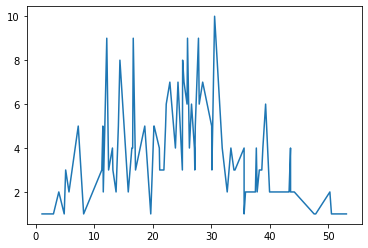

In [ ]:
kills.Time.value_counts().sample(80).sort_index().plot.line()

Gráfico de Abates x Tempo

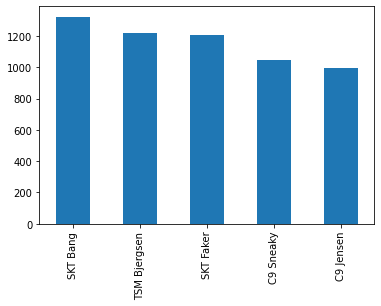

In [ ]:
kills.Killer.value_counts().head(5).plot.bar()

Jogadores com mais abates

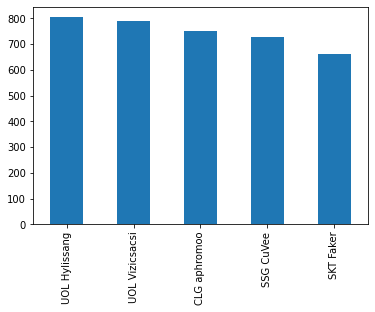

In [ ]:
kills.Victim.loc[kills.Victim != "None"].value_counts().head(5).plot.bar()

Jogadores com mais mortes



---

## INFORMAÇÕES DA PARTIDA

In [ ]:
print("Partida mais longa:", matchinfo.gamelength.max(), "minutos")
print("Partida mais curta:", matchinfo.gamelength.min(), "minutos")
print("Média de duração das partidas:", round(matchinfo.gamelength.mean(), 2), "minutos")

Partida mais longa: 95 minutos
Partida mais curta: 17 minutos
Média de duração das partidas: 37.01 minutos


In [ ]:
vitoriasAzul = matchinfo.bResult.value_counts()[1]
vitoriasVermelho = matchinfo.rResult.value_counts()[1]
print("O time azul venceu", vitoriasAzul, "das vezes")
print("O time vermelho venceu", vitoriasVermelho, "das vezes")
print(f"A taxa de vitórias do time azul é {round(vitoriasAzul/vitoriasVermelho*100-100, 2)}% maior")

O time azul venceu 4146 das vezes
O time vermelho venceu 3474 das vezes
A taxa de vitórias do time azul é 19.34% maior




---

## INFORMAÇÕES SOBRE OS MONSTROS ÉPICOS

In [ ]:
print("Média da execução do dragão:", round(monsters.loc[monsters.Type == "DRAGON"].Time.mean(), 2), "minutos")
print("Dragão executado em menor tempo:", round(monsters.loc[monsters.Type == "DRAGON"].Time.min(), 2), "minutos")
print("Dragão executado em maior tempo:", round(monsters.loc[monsters.Type == "DRAGON"].Time.max(), 2), "minutos")

Média da execução do dragão: 23.16 minutos
Dragão executado em menor tempo: 3.08 minutos
Dragão executado em maior tempo: 72.91 minutos


In [ ]:
print("Média da execução do arauto:", round(monsters.loc[monsters.Type == "RIFT_HERALD"].mean()["Time"], 2), "minutos")
print("Arauto executado em menor tempo:", round(monsters.loc[monsters.Type == "RIFT_HERALD"].min()["Time"], 2), "minutos")
print("Arauto executado em maior tempo:", round(monsters.loc[monsters.Type == "RIFT_HERALD"].max()["Time"], 2), "minutos")

Média da execução do arauto: 14.76 minutos
Arauto executado em menor tempo: 4.27 minutos
Arauto executado em maior tempo: 19.91 minutos


In [ ]:
print("Média da execução do Barão:", round(monsters.loc[monsters.Type == "BARON_NASHOR"].mean()["Time"], 2), "minutos")
print("Barão executado em menor tempo:", round(monsters.loc[monsters.Type == "BARON_NASHOR"].Time.min(), 2), "minutos")
print("Barão executado em maior tempo:", round(monsters.loc[monsters.Type == "BARON_NASHOR"].max()["Time"], 2), "minutos")

Média da execução do Barão: 31.5 minutos
Barão executado em menor tempo: 18.85 minutos
Barão executado em maior tempo: 92.36 minutos




---


## INFORMAÇÕES SOBRE AS ESTRUTURAS

In [ ]:
dataset = structures.loc[structures.Type != "FOUNTAIN_TURRET"]
dataset.Lane.value_counts()

MID_LANE    51454
BOT_LANE    32420
TOP_LANE    29828
Name: Lane, dtype: int64

In [ ]:
print("Tempo com maior número de torres destruidas:", round(dataset.Time.mean(), 2), "minutos")
print("Destruição de estrutura mais rapida:", round(dataset.Time.min(), 2), "minutos")
print("Destruição de estrutura mais atrasada:", round(dataset.Time.max(), 2), "minutos")

Tempo com maior número de torres destruidas: 27.11 minutos
Destruição de estrutura mais rapida: 3.1 minutos
Destruição de estrutura mais atrasada: 94.51 minutos




---

## COUNTPLOT E FACTORPLOT

In [ ]:
matchinfo.head(5)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


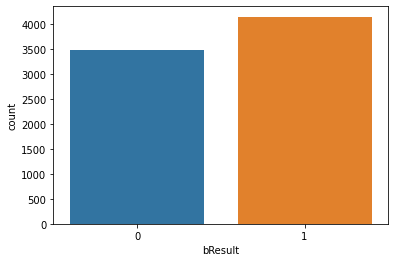

In [ ]:
sns.countplot(matchinfo.bResult)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


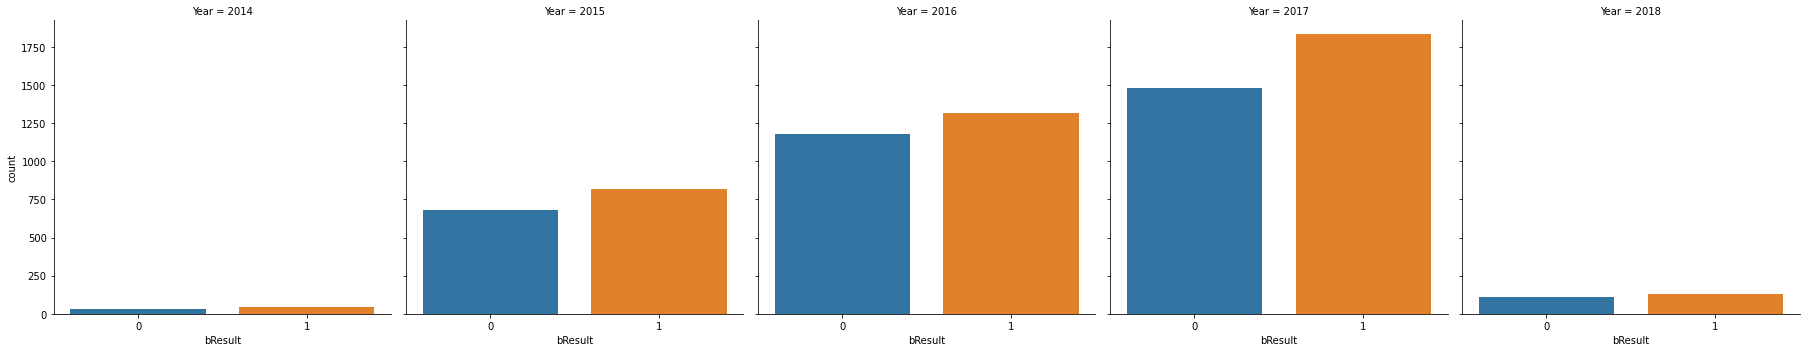

In [ ]:
sns.factorplot(x="bResult", col="Year", kind="count", data=matchinfo)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


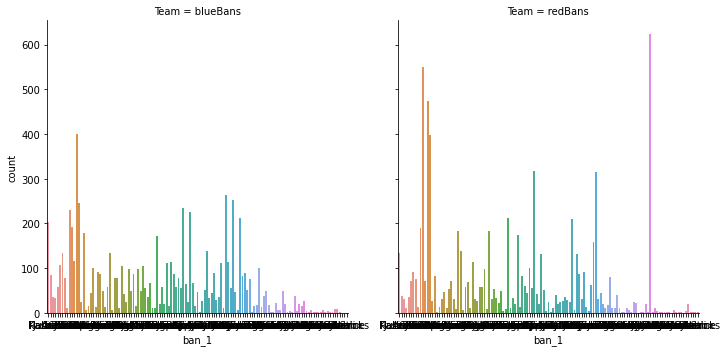

In [ ]:
sns.factorplot(x="ban_1", col="Team", kind="count", data=bans)

In [ ]:
bans.loc[bans.Team == "redBans"].ban_1.value_counts()

Zac             623
Kalista         549
Leblanc         475
Nidalee         397
Ryze            318
               ... 
Akali             1
FiddleSticks      1
Kayn              1
Yorick            1
Aatrox            1
Name: ban_1, Length: 124, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


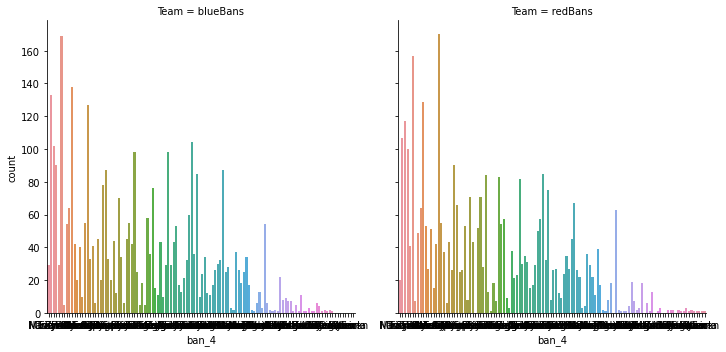

In [ ]:
sns.factorplot(x="ban_4", col="Team", kind="count", data=bans)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


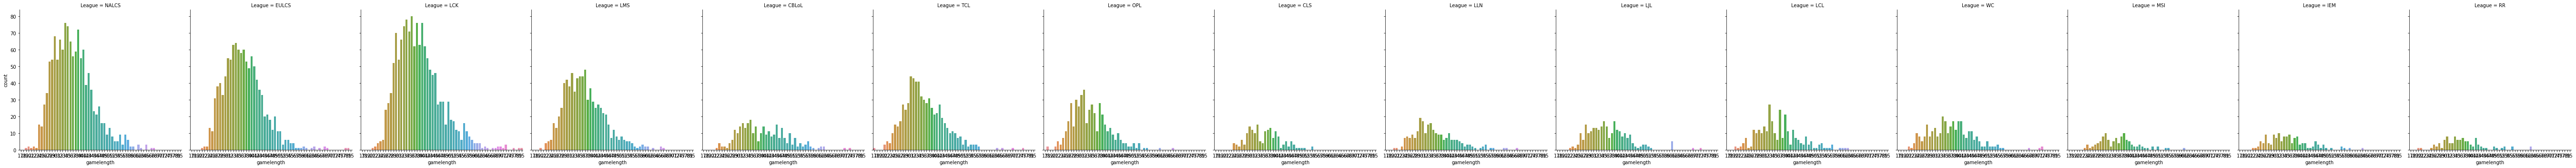

In [ ]:
sns.factorplot(x="gamelength", col="League", kind="count", data=matchinfo)



---

## ALGORITMO DE PREDIÇÃO DE VITÓRIA

1 - Importação dos modelos

2 - Escolha dos hiperparâmetros e instanciação da classe escolhida.

3.1 Feature Matrix

3.2 Target Array

3.3 Separação do Banco de Dados

4 - Ajuste do modelo de dados

5 - Predições em dados novos

Import nas bibliotecas do sklearn

In [ ]:
# 1 - Importação dos modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
matchinfo.head(5)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


Transformação das strings para números únicos (Campeões)

In [ ]:
matchinfo = pd.read_csv("matchinfo.csv")

champs = []

for i in matchinfo.blueTopChamp.unique():
    if i not in champs:
        champs.append(i)

for i in matchinfo.blueJungleChamp.unique():
    if i not in champs:
        champs.append(i)

for i in matchinfo.blueMiddleChamp.unique():
    if i not in champs:
        champs.append(i)

for i in matchinfo.blueADCChamp.unique():
    if i not in champs:
        champs.append(i)

for i in matchinfo.blueSupportChamp.unique():
    if i not in champs:
        champs.append(i)

champs.append("Aatrox")
champs.append("Volibear")
champs.append("MonkeyKing")
champs.append("Tryndamere")

champs.sort()
champs

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Ashe',
 'AurelionSol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 'Chogath',
 'Corki',
 'Darius',
 'Diana',
 'DrMundo',
 'Draven',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'FiddleSticks',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'JarvanIV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 'Khazix',
 'Kindred',
 'Kled',
 'KogMaw',
 'Leblanc',
 'LeeSin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'MasterYi',
 'MissFortune',
 'MonkeyKing',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Nidalee',
 'Nocturne',
 'Nunu',
 'Olaf',
 'Orianna',
 'Ornn',
 'Pantheon',
 'Poppy',
 'Quinn',
 'Rakan',
 'Rammus

Transformação das strings para números únicos (Jogadores)

In [ ]:
matchinfo = pd.read_csv("matchinfo.csv")
players = []

for i in matchinfo.blueTop.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.blueJungle.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.blueMiddle.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.blueADC.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.blueSupport.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.redTop.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.redJungle.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.redMiddle.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.redADC.unique():
    if i not in players:
        players.append(i)

for i in matchinfo.redSupport.unique():
    if i not in players:
        players.append(i)

Transformação das strings para números únicos (Times)

In [ ]:
matchinfo = pd.read_csv("matchinfo.csv")
teams = []

for i in matchinfo.blueTeamTag.unique():
    if i not in teams:
        teams.append(i)

for i in matchinfo.redTeamTag.unique():
    if i not in teams:
        teams.append(i)

Substituição dos strings pelos números

In [ ]:
matchinfo = pd.read_csv("matchinfo.csv")

for i in range(0, len(matchinfo)):
    matchinfo.blueTopChamp[i] = champs.index(matchinfo.blueTopChamp[i]) + 1
    matchinfo.blueJungleChamp[i] = champs.index(matchinfo.blueJungleChamp[i]) + 1
    matchinfo.blueMiddleChamp[i] = champs.index(matchinfo.blueMiddleChamp[i]) + 1
    matchinfo.blueADCChamp[i] = champs.index(matchinfo.blueADCChamp[i]) + 1
    matchinfo.blueSupportChamp[i] = champs.index(matchinfo.blueSupportChamp[i]) + 1
    matchinfo.redTopChamp[i] = champs.index(matchinfo.redTopChamp[i]) + 1
    matchinfo.redJungleChamp[i] = champs.index(matchinfo.redJungleChamp[i]) + 1
    matchinfo.redMiddleChamp[i] = champs.index(matchinfo.redMiddleChamp[i]) + 1
    matchinfo.redADCChamp[i] = champs.index(matchinfo.redADCChamp[i]) + 1
    matchinfo.redSupportChamp[i] = champs.index(matchinfo.redSupportChamp[i]) + 1

    matchinfo.blueTop[i] = players.index(matchinfo.blueTop[i]) + 1
    matchinfo.blueJungle[i] = players.index(matchinfo.blueJungle[i]) + 1
    matchinfo.blueMiddle[i] = players.index(matchinfo.blueMiddle[i]) + 1
    matchinfo.blueADC[i] = players.index(matchinfo.blueADC[i]) + 1
    matchinfo.blueSupport[i] = players.index(matchinfo.blueSupport[i]) + 1
    matchinfo.redTop[i] = players.index(matchinfo.redTop[i]) + 1
    matchinfo.redJungle[i] = players.index(matchinfo.redJungle[i]) + 1
    matchinfo.redMiddle[i] = players.index(matchinfo.redMiddle[i]) + 1
    matchinfo.redADC[i] = players.index(matchinfo.redADC[i]) + 1
    matchinfo.redSupport[i] = players.index(matchinfo.redSupport[i]) + 1

    matchinfo.blueTeamTag[i] = teams.index(matchinfo.blueTeamTag[i]) + 1
    matchinfo.redTeamTag[i] = teams.index(matchinfo.redTeamTag[i]) + 1

In [ ]:
matchinfo.head(5)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,1,1,0,8,40,1,41,321,90,650,2,948,48,1262,43,8,35,328,25,338,31,955,102,1268,113,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,2,0,1,6,38,2,35,322,92,651,2,949,15,1263,63,6,41,326,44,655,10,953,19,1266,7,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,3,1,0,10,40,3,91,323,92,652,31,950,102,1264,7,10,101,330,62,658,10,957,19,1518,43,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,4,0,1,7,41,4,41,324,44,653,61,951,102,1265,113,7,35,327,81,668,66,954,60,1267,43,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,5,1,0,9,35,5,35,325,44,654,64,952,114,974,43,9,101,329,90,657,66,956,19,1269,7,http://matchhistory.na.leagueoflegends.com/en/...


Divisão dos modelos em teste e treino

In [ ]:
# 3.1 Feature Matrix
x_geral = matchinfo.loc[ :, ["blueTeamTag", "redTeamTag", "Year" ,"blueTopChamp", "blueJungleChamp", "blueMiddleChamp", "blueADCChamp", "blueSupportChamp", "redTopChamp", "redJungleChamp", "redMiddleChamp", "redADCChamp", "redSupportChamp", "blueTop", "blueJungle", "blueMiddle", "blueADC", "blueSupport", "redTop", "redJungle", "redMiddle", "redADC", "redSupport"]]

# 3.2 Target Array
y_geral = matchinfo.bResult

# 3.3 Separação do Banco de Dados
x_train, x_test, y_train, y_test = train_test_split(x_geral, y_geral, random_state = 123)

Predição por maioria de vitórias (54.4409% de acurácia)

In [ ]:
vitoriasAzul/(vitoriasAzul + vitoriasVermelho)

0.5440944881889764

Modelo Random Forest Classifier (62.4671% de acurácia)



In [ ]:
modelRFC = RandomForestClassifier()    # 2 - Escolha dos hiperparâmetros e instanciação da classe escolhida.

modelRFC.fit(x_train, y_train)         # 4 - Ajuste do modelo de dados

predictsRFC = modelRFC.predict(x_test) # 5 - Predições em dados novos
accuracy_score(y_test, predictsRFC)

0.6246719160104987

Modelo Naive Bayes (52.9658% de acurácia)

In [ ]:
modelNB = GaussianNB()               # 2 - Escolha dos hiperparâmetros e instanciação da classe escolhida.
modelNB.fit(x_train, y_train)        # 4 - Ajuste do modelo de dados
predictsNB = modelNB.predict(x_test) # 5 - Predições em dados novos
accuracy_score(y_test, predictsNB)

0.5296587926509186

Modelo Decision Tree Classifier (53.6482% de acurácia)

In [ ]:
modelDTC = DecisionTreeClassifier()    # 2 - Escolha dos hiperparâmetros e instanciação da classe escolhida.
modelDTC.fit(x_train, y_train)         # 4 - Ajuste do modelo de dados
predictsDTC = modelDTC.predict(x_test) # 5 - Predições em dados novos
accuracy_score(y_test, predictsDTC)

0.5475065616797901

Modelo K Neighbors Classifier (55.1181% de acurácia máxima)

In [ ]:
modelKNC = KNeighborsClassifier(n_neighbors = 3)
cross_val_score(modelKNC, x_test, y=y_test, cv = 5)

array([0.5328084 , 0.5511811 , 0.50656168, 0.5328084 , 0.54068241])



---



Bibliotecas

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

Criação do Pipeline e Random Search

In [ ]:
# Criar pipeline
standardScaler = StandardScaler()
svm = SVC(kernel="rbf", C = 0.1, gamma = 0.1)
pipeline = Pipeline([('transformer', standardScaler), 
                     ('predictor', svm)])

# Definir intervalo de valores
param_dist = dict(
    predictor__gamma = np.logspace(-3, 3, 8),
    predictor__C     = np.logspace(-2, 3, 8)
)

rand = RandomizedSearchCV(pipeline, param_dist, cv=10, 
                          n_iter = 10, random_state = 123,
                          scoring='accuracy')
rand.fit(x_test, y=y_test)

Retreinamento com os melhores valores

In [ ]:
print(rand.best_score_)
print(rand.best_params_)

0.5485533204739598
{'predictor__gamma': 1000.0, 'predictor__C': 1.3894954943731375}


In [ ]:
## Retreinando
standardScaler = StandardScaler()
X_scaled       = standardScaler.fit_transform(x_train)

svm = SVC(kernel="linear", C = 1.3894954943731375)
svm.fit(X_scaled, y_train)
predictSVM = svm.predict(x_test)
accuracy_score(y_test, predictSVM)

Definições das funçoes precision, recall, medida_f e specificity

In [ ]:
def precision(target, prediction):
  matriz = confusion_matrix(y_test, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fp)

def recall(target, prediction):
  matriz = confusion_matrix(y_test, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp+fn)

def medida_f(target, prediction):
  rec = recall(target, prediction)
  prec = precision(target, prediction)
  return 2*rec*prec/(rec+prec)

def specificity(target, prediction):
  matriz = confusion_matrix(y_test, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tn/(tn+fp)

True Negative: 433
True Positive: 757
False Positive: 427
False Negative: 288


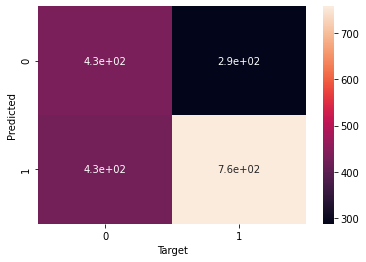

In [ ]:
matriz = confusion_matrix(y_test, predictsRFC)
tn, fp, fn, tp = matriz.ravel()
print("True Negative:", tn)
print("True Positive:", tp)
print("False Positive:", fp)
print("False Negative:", fn)
sns.heatmap(matriz.T, annot = True)
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.show()

Medidas usando o melhores classificador anterior

In [ ]:
print("Precision: ", precision(y_test, predictsRFC))
print("Recall: ", recall(y_test, predictsRFC))
print("F Measure: ", medida_f(y_test, predictsRFC))
print("Specificity: ", specificity(y_test, predictsRFC))

Precision:  0.6393581081081081
Recall:  0.724401913875598
F Measure:  0.6792283535217587
Specificity:  0.5034883720930232


Medidas usando o melhor classificador obtido pelo Random Search

In [ ]:
print("Precision: ", precision(y_test, predictSVM))
print("Recall: ", recall(y_test, predictSVM))
print("F Measure: ", medida_f(y_test, predictSVM))
print("Specificity: ", specificity(y_test, predictSVM))

Precision:  0.5485564304461942
Recall:  1.0
F Measure:  0.7084745762711864
Specificity:  0.0
